In [177]:
from functools import cache
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [2]:
estados_mexicanos = {
    "AGUASCALIENTES",
    "BAJA CALIFORNIA",
    "BAJA CALIFORNIA SUR",
    "CAMPECHE",
    "CHIAPAS",
    "CHIHUAHUA",
    "COAHUILA DE ZARAGOZA",
    "COLIMA",
    "DISTRITO FEDERAL",
    "DURANGO",
    "GUANAJUATO",
    "GUERRERO",
    "HIDALGO",
    "JALISCO",
    "MEXICO",
    "MICHOACAN DE OCAMPO",
    "MORELOS",
    "NAYARIT",
    "NUEVO LEON",
    "OAXACA",
    "PUEBLA",
    "QUERETARO  DE ARTEAGA",
    "QUINTANA ROO",
    "SAN LUIS POTOSI",
    "SINALOA",
    "SONORA",
    "TABASCO",
    "TAMAULIPAS",
    "TLAXCALA",
    "VERACRUZ DE IGNACIO DE LA LLAVE",
    "YUCATAN",
    "ZACATECAS",
}

In [3]:
df = pd.read_csv("2010-2019.csv")

/var/folders/05/y38rqjl55hjb_hbnypxzgrsw0000gn/T/ipykernel_93495/3168623387.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2010-2019.csv")


In [4]:
def _ano_nacimiento_vivo_func(str_date):
    try:
        return str_date.split("/")[-1]
    except:
        return ""


df["año_de_nacimiento_vivo"] = df["fecha_nacimiento_nac_vivo"].apply(
    _ano_nacimiento_vivo_func
)

In [19]:
df = df[(5 < df["edad_madre"]) & (df["edad_madre"] < 90)]

In [20]:
df_trisomias = df[df["codigo_anomalia"].apply(lambda x: "Q9" in str(x))]

In [87]:
consulta_trisomias = df_trisomias.groupby(["año_de_nacimiento_vivo"]).agg(
    {
        "edad_madre": [
            "count",
            "mean",
            "std",
            "min",
            "max",
            "median",
            lambda x: x.quantile(0.25),  # For Q1
            lambda x: x.quantile(0.75),  # For Q3
        ],
    }
)
consulta_trisomias = consulta_trisomias.rename(
    columns={
        "<lambda_0>": "Q1",
        "<lambda_1>": "Q3",
    }
)
consulta_trisomias

edad_madre                                            \
                            count       mean       std min max median    Q1   
año_de_nacimiento_vivo                                                        
2010                          930  30.546237  8.244939  10  48   31.0  23.0   
2011                         1051  31.010466  8.193777  12  49   32.0  24.0   
2012                          961  30.462019  8.310565  13  47   31.0  23.0   
2013                         1055  31.182938  8.247919  11  51   32.0  24.0   
2014                         1031  31.018429  8.356304  13  50   32.0  24.0   
2015                         1016  31.500984  8.295052  14  52   32.0  24.0   
2016                         1044  31.453065  8.147413  14  47   32.0  24.0   
2017                         1043  31.410355  8.174581  13  47   33.0  24.0   
2018                         1059  31.064212  8.173198  13  48   32.0  24.0   
2019                          941  32.018066  8.195918  13  47   34.0  25.0   

                               
                           Q3  
año_de_nacimiento_vivo         
2010                    37.75  
2011                    38.00  
2012                    38.00  
2013                    38.00  
2014                    38.00  
2015                    39.00  
2016                    39.00  
2017                    38.50  
2018                    38.00  
2019                    39.00

año_de_nacimiento_vivo
2010     930
2011    1051
2012     961
2013    1055
2014    1031
2015    1016
2016    1044
2017    1043
2018    1059
2019     941
Name: (edad_madre, count), dtype: int64

In [88]:
# Edades de madres
consulta_total = df.groupby(["año_de_nacimiento_vivo"]).agg(
    {
        "edad_madre": [
            "count",
            "mean",
            "std",
            "min",
            "max",
            "median",
            lambda x: x.quantile(0.25),  # For Q1
            lambda x: x.quantile(0.75),  # For Q3
        ],
    }
)
consulta_total = consulta_total.rename(
    columns={
        "<lambda_0>": "Q1",
        "<lambda_1>": "Q3",
    }
)
consulta_total

edad_madre                                            \
                            count       mean       std min max median    Q1   
año_de_nacimiento_vivo                                                        
2010                      2063533  25.253220  6.319567   9  58   24.0  20.0   
2011                      2156751  25.234223  6.331894   9  58   24.0  20.0   
2012                      2197327  25.195768  6.321840   9  58   24.0  20.0   
2013                      2189257  25.198235  6.322081   9  59   24.0  20.0   
2014                      2173773  25.276009  6.322130   9  58   24.0  20.0   
2015                      2143345  25.367835  6.296604   9  59   25.0  20.0   
2016                      2079251  25.468008  6.292815   9  59   25.0  20.0   
2017                      2037647  25.510821  6.305873   9  62   25.0  21.0   
2018                      1940338  25.678051  6.328369   9  60   25.0  21.0   
2019                      1867693  25.840630  6.342544   9  58   25.0  21.0   

                              
                          Q3  
año_de_nacimiento_vivo        
2010                    30.0  
2011                    30.0  
2012                    30.0  
2013                    30.0  
2014                    30.0  
2015                    30.0  
2016                    30.0  
2017                    30.0  
2018                    30.0  
2019                    30.0

In [89]:
consulta = consulta_total.join(
    consulta_trisomias, rsuffix="_trisomias", lsuffix="_general"
)

In [90]:
consulta["porcentaje"] = (
    consulta[("edad_madre_trisomias", "count")]
    / consulta[("edad_madre_general", "count")]
)

In [91]:
consulta

edad_madre_general                                      \
                                    count       mean       std min max median   
año_de_nacimiento_vivo                                                          
2010                              2063533  25.253220  6.319567   9  58   24.0   
2011                              2156751  25.234223  6.331894   9  58   24.0   
2012                              2197327  25.195768  6.321840   9  58   24.0   
2013                              2189257  25.198235  6.322081   9  59   24.0   
2014                              2173773  25.276009  6.322130   9  58   24.0   
2015                              2143345  25.367835  6.296604   9  59   25.0   
2016                              2079251  25.468008  6.292815   9  59   25.0   
2017                              2037647  25.510821  6.305873   9  62   25.0   
2018                              1940338  25.678051  6.328369   9  60   25.0   
2019                              1867693  25.840630  6.342544   9  58   25.0   

                                   edad_madre_trisomias                       \
                          Q1    Q3                count       mean       std   
año_de_nacimiento_vivo                                                         
2010                    20.0  30.0                  930  30.546237  8.244939   
2011                    20.0  30.0                 1051  31.010466  8.193777   
2012                    20.0  30.0                  961  30.462019  8.310565   
2013                    20.0  30.0                 1055  31.182938  8.247919   
2014                    20.0  30.0                 1031  31.018429  8.356304   
2015                    20.0  30.0                 1016  31.500984  8.295052   
2016                    20.0  30.0                 1044  31.453065  8.147413   
2017                    21.0  30.0                 1043  31.410355  8.174581   
2018                    21.0  30.0                 1059  31.064212  8.173198   
2019                    21.0  30.0                  941  32.018066  8.195918   

                                                   porcentaje  
                       min max median    Q1     Q3             
año_de_nacimiento_vivo                                         
2010                    10  48   31.0  23.0  37.75   0.000451  
2011                    12  49   32.0  24.0  38.00   0.000487  
2012                    13  47   31.0  23.0  38.00   0.000437  
2013                    11  51   32.0  24.0  38.00   0.000482  
2014                    13  50   32.0  24.0  38.00   0.000474  
2015                    14  52   32.0  24.0  39.00   0.000474  
2016                    14  47   32.0  24.0  39.00   0.000502  
2017                    13  47   33.0  24.0  38.50   0.000512  
2018                    13  48   32.0  24.0  38.00   0.000546  
2019                    13  47   34.0  25.0  39.00   0.000504

# Pendiente

Generar gráfica de cajas con edades de las madres con hijos de trisomias.

https://stackoverflow.com/a/66565512

In [227]:
stats = []
for i, x in consulta_trisomias.iterrows():
    stat = dict(
        label=i,
        mean=x[("edad_madre", "mean")],
        count=x[("edad_madre", "count")],
        std=x[("edad_madre", "std")],
        whislo=x[("edad_madre", "min")],
        whishi=x[("edad_madre", "max")],
        med=x[("edad_madre", "median")],
        q1=x[("edad_madre", "Q1")],
        q3=x[("edad_madre", "Q3")],
    )
    stats.append(stat)

In [345]:
consulta_trisomias.describe()

edad_madre                                                         \
             count       mean        std        min        max     median   
count    10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean   1013.100000  31.166677   8.233967  12.600000  48.600000  32.100000   
std      49.771589   0.461478   0.068843   1.264911   1.837873   0.875595   
min     930.000000  30.462019   8.147413  10.000000  47.000000  31.000000   
25%     974.750000  31.012457   8.179380  12.250000  47.000000  32.000000   
50%    1037.000000  31.123575   8.220429  13.000000  48.000000  32.000000   
75%    1049.250000  31.442388   8.283268  13.000000  49.750000  32.000000   
max    1059.000000  32.018066   8.356304  14.000000  52.000000  34.000000   

                             
              Q1         Q3  
count  10.000000  10.000000  
mean   23.900000  38.325000  
std     0.567646   0.500694  
min    23.000000  37.750000  
25%    24.000000  38.000000  
50%    24.000000  38.000000  
75%    24.000000  38.875000  
max    25.000000  39.000000

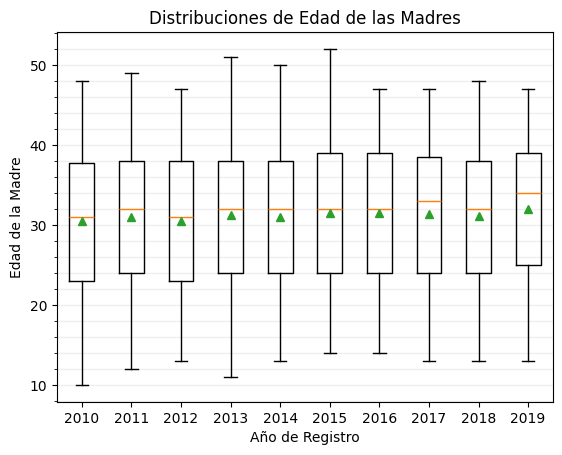

In [228]:
%matplotlib notebook
from matplotlib.figure import Figure
from matplotlib.ticker import AutoMinorLocator

fig = Figure()
ax = fig.add_subplot()
ax.bxp(
    stats,
    showfliers=False,
    showmeans=True,
)
ax.set_ylabel("Edad de la Madre")
ax.set_xlabel("Año de Registro")
ax.set_title("Distribuciones de Edad de las Madres")
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.grid(visible=True, which="both", axis="y", linewidth=1, alpha=0.2)
fig

In [238]:
def _anomalias_filtradas(anomalia):
    splitted = [x for x in anomalia.split(",") if len(x) == 4 and x[:2] == "Q9"]
    if len(splitted) < 2:
        return ",".join(splitted)
    if splitted[0] == splitted[1]:
        return splitted[0]
    return ",".join(splitted)


def _clasificador(codigos):

    if "Q910" in codigos or "Q911" in codigos or "Q912" in codigos or "Q913" in codigos:
        return "Edwards"
    if "Q914" in codigos or "Q915" in codigos or "Q916" in codigos or "Q917" in codigos:
        return "Patau"
    if "Q90" in codigos:
        return "Down"
    return "Otra"


df_trisomias["Trisomía"] = df_trisomias.codigo_anomalia.apply(
    _anomalias_filtradas
).apply(_clasificador)
df_trisomias["Síndrome de Down"] = df_trisomias["Trisomía"] == "Down"
df_trisomias["Síndrome de Edwards"] = df_trisomias["Trisomía"] == "Edwards"
df_trisomias["Síndrome de Patau"] = df_trisomias["Trisomía"] == "Patau"
df_trisomias["Otro Síndrome"] = df_trisomias["Trisomía"] == "Otra"

/var/folders/05/y38rqjl55hjb_hbnypxzgrsw0000gn/T/ipykernel_93495/1078194369.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trisomias["Trisomía"] = df_trisomias.codigo_anomalia.apply(
/var/folders/05/y38rqjl55hjb_hbnypxzgrsw0000gn/T/ipykernel_93495/1078194369.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trisomias["Síndrome de Down"] = (df_trisomias["Trisomía"] == "Down")
/var/folders/05/y38rqjl55hjb_hbnypxzgrsw0000gn/T/ipykernel_93495/1078194369.py:34: SettingWithCopyWarning: 
A value is 

In [239]:
df_trisomias.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'edo_captura', 'edo_nac_madre',
       'fecha_nac_madre', 'edad_madre', 'estado_conyugal',
       'entidad_residencia_madre', 'numero_embarazos', 'hijos_nacidos_muertos',
       'hijos_nacidos_vivos', 'hijos_sobrevivientes', 'el_hijo_anterior_nacio',
       'vive_aun_hijo_anterior', 'orden_nacimiento',
       'recibio_atencion_prenatal', 'trimestre_recibio_primera_consulta',
       'total_consultas_recibidas', 'madre_sobrevivio_al_parto',
       'escolaridad_madre', 'ocupacion_habitual_madre', 'trabaja_actualmente',
       'fecha_nacimiento_nac_vivo', 'hora_nacimiento_nac_vivo',
       'sexo_nac_vivo', 'semanas_gestacion_nac_vivo', 'talla_nac_vivo',
       'peso_nac_vivo', 'valoracion_apgar_nac_vivo',
       'valoracion_silverman_nac_vivo', 'producto_de_un_embarazo',
       'codigo_anomalia', 'entidad_certifico', 'año_de_nacimiento_vivo',
       'Trisomia', 'Sindrome de Down', 'Sindrome de Edwards',
       'Sindrome de Patau', 'Otro Sindrome', 'Tris

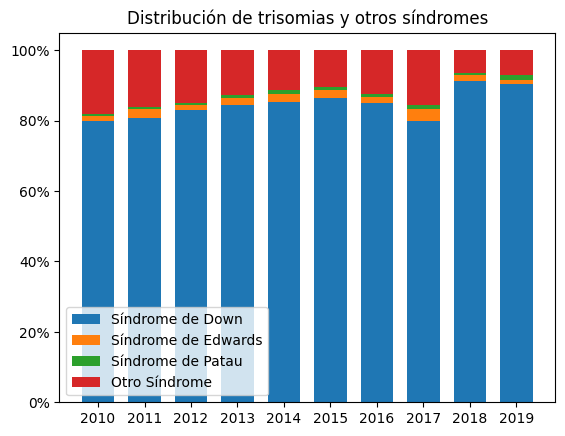

In [341]:
import matplotlib.ticker as mtick

fig = Figure()
ax = fig.add_subplot()
_to_plot = df_trisomias.groupby("año_de_nacimiento_vivo").agg(
    {
        "Síndrome de Down": ["sum"],
        "Síndrome de Edwards": ["sum"],
        "Síndrome de Patau": ["sum"],
        "Otro Síndrome": ["sum"],
    }
)
_index = _to_plot.index.to_list()
_records = _to_plot.to_dict("records")
_labels = [x[0] for x in _records[0].keys()]
_data = np.array([[*x.values()] for x in _records], dtype="float64")
_totals = (_data @ np.ones(_data.shape[1])) / 100
bottom = _data[:, 0] * 0
for i, label in enumerate(_labels):
    data = _data[:, i] / _totals
    ax.bar(_index, data, 0.7, label=label, bottom=bottom)
    bottom += data
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Distribución de trisomias y otros síndromes")
ax.legend()
fig

In [343]:
_to_plot = df_trisomias.groupby("año_de_nacimiento_vivo").agg(
    {
        "Síndrome de Down": ["sum"],
        "Síndrome de Edwards": ["sum"],
        "Síndrome de Patau": ["sum"],
        "Otro Síndrome": ["sum"],
    }
)
_to_plot.columns = ["Down", "Edwards", "Patau", "Otros"]
_to_plot["Total"] = _to_plot.apply(sum, axis=1)
for col in ["Down", "Edwards", "Patau", "Otros"]:
    _to_plot[col] = _to_plot[col] / _to_plot["Total"]
_to_plot.describe()

Down    Edwards      Patau      Otros        Total
count  10.000000  10.000000  10.000000  10.000000    10.000000
mean    0.846123   0.020646   0.007997   0.125234  1013.100000
std     0.040421   0.006969   0.003110   0.038154    49.771589
min     0.797699   0.010627   0.004162   0.065156   930.000000
25%     0.813188   0.016582   0.005697   0.105395   974.750000
50%     0.846609   0.019526   0.007144   0.126721  1037.000000
75%     0.861515   0.023294   0.010124   0.154212  1049.250000
max     0.912181   0.036433   0.012752   0.180645  1059.000000

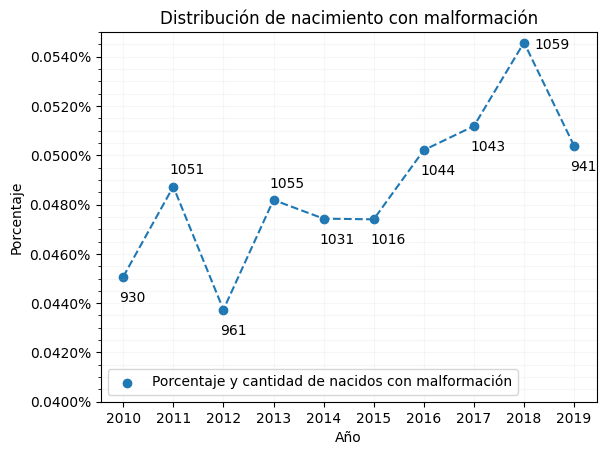

In [325]:
fig = Figure()
ax = fig.add_subplot()
_x = [int(x) for x in (consulta.index.to_list())]
_z = consulta[("edad_madre_trisomias", "count")].to_list()
_y = (consulta.porcentaje * 100).to_list()
ax.plot(_x, _y, "--")
ax.scatter(_x, _y, label="Porcentaje y cantidad de nacidos con malformación")

ax.annotate(f"{int(_z[0])}", (_x[0] - 0.075, _y[0] - 0.001))
ax.annotate(f"{int(_z[1])}", (_x[1] - 0.075, _y[1] + 0.0005))
ax.annotate(f"{int(_z[2])}", (_x[2] - 0.075, _y[2] - 0.001))
ax.annotate(f"{int(_z[3])}", (_x[3] - 0.075, _y[3] + 0.0005))
ax.annotate(f"{int(_z[4])}", (_x[4] - 0.075, _y[4] - 0.001))
ax.annotate(f"{int(_z[5])}", (_x[5] - 0.075, _y[5] - 0.001))
ax.annotate(f"{int(_z[6])}", (_x[6] - 0.075, _y[6] - 0.001))
ax.annotate(f"{int(_z[7])}", (_x[7] - 0.075, _y[7] - 0.001))
ax.annotate(f"{int(_z[8])}", (_x[8] + 0.2, _y[8] - 0.00025))
ax.annotate(f"{int(_z[9])}", (_x[9] - 0.075, _y[9] - 0.001))

ax.set_ylim(0.04, 0.055)
ax.xaxis.set_ticks(_x)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Distribución de nacimiento con malformación")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje")
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(alpha=0.1, which="both")
ax.legend()
fig

In [326]:
consulta.porcentaje.describe()

count    10.000000
mean      0.000487
std       0.000031
min       0.000437
25%       0.000474
50%       0.000485
75%       0.000503
max       0.000546
Name: porcentaje, dtype: float64

In [328]:
stats = []
for i, x in consulta_total.iterrows():
    stat = dict(
        label=i,
        mean=x[("edad_madre", "mean")],
        count=x[("edad_madre", "count")],
        std=x[("edad_madre", "std")],
        whislo=x[("edad_madre", "min")],
        whishi=x[("edad_madre", "max")],
        med=x[("edad_madre", "median")],
        q1=x[("edad_madre", "Q1")],
        q3=x[("edad_madre", "Q3")],
    )
    stats.append(stat)

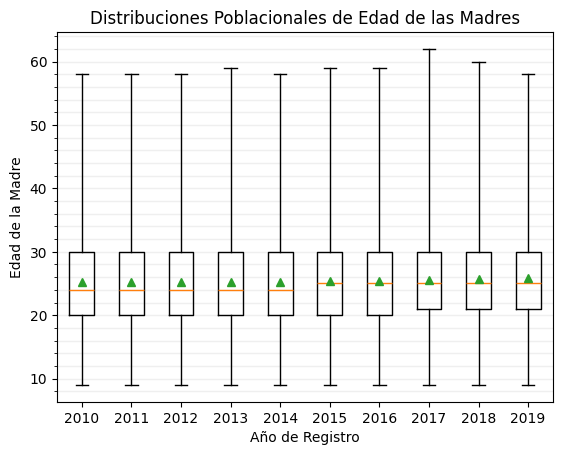

In [332]:
%matplotlib notebook
from matplotlib.figure import Figure
from matplotlib.ticker import AutoMinorLocator

fig = Figure()
ax = fig.add_subplot()
ax.bxp(
    stats,
    showfliers=False,
    showmeans=True,
)
ax.set_ylabel("Edad de la Madre")
ax.set_xlabel("Año de Registro")
ax.set_title("Distribuciones Poblacionales de Edad de las Madres")
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.grid(visible=True, which="both", axis="y", linewidth=1, alpha=0.2)
fig

In [350]:
consulta_total.describe()

edad_madre                                                    \
              count       mean        std   min        max     median   
count  1.000000e+01  10.000000  10.000000  10.0  10.000000  10.000000   
mean   2.084892e+06  25.402280   6.318372   9.0  58.900000  24.500000   
std    1.109581e+05   0.220145   0.015605   0.0   1.286684   0.527046   
min    1.867693e+06  25.195768   6.292815   9.0  58.000000  24.000000   
25%    2.044118e+06  25.238972   6.309296   9.0  58.000000  24.000000   
50%    2.111298e+06  25.321922   6.321961   9.0  58.500000  24.500000   
75%    2.169518e+06  25.500118   6.326809   9.0  59.000000  25.000000   
max    2.197327e+06  25.840630   6.342544   9.0  62.000000  25.000000   

                        
              Q1    Q3  
count  10.000000  10.0  
mean   20.300000  30.0  
std     0.483046   0.0  
min    20.000000  30.0  
25%    20.000000  30.0  
50%    20.000000  30.0  
75%    20.750000  30.0  
max    21.000000  30.0